In [74]:
%pip install seaborn

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

sns.set_style('whitegrid')

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

In [76]:
house_test = pd.read_csv('house_train.csv')

In [77]:
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [78]:
house_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [79]:
#Find any missing values in the dataset
house_test.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [80]:
###Removing Irrelevant coloumn
columns_to_keep = ['SalePrice','MoSold','YrSold', 'MSZoning','LotArea','Alley','Utilities','BldgType','OverallCond','YearBuilt','MasVnrArea','TotalBsmtSF', 'Heating', 'CentralAir', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageYrBlt', 'PoolArea', 'WoodDeckSF', 'OpenPorchSF', ]
df_clean = house_test[columns_to_keep]

In [81]:
df_clean.isnull().sum()

,0
SalePrice,0
MoSold,0
YrSold,0
MSZoning,0
LotArea,0
Alley,1369
Utilities,0
BldgType,0
OverallCond,0
YearBuilt,0


In [82]:
df_clean.GarageYrBlt.fillna(0)
df_clean.GarageYrBlt.dropna()

,GarageYrBlt
0,2003.0
1,1976.0
2,2001.0
3,1998.0
4,2000.0
...,...
1455,1999.0
1456,1978.0
1457,1941.0
1458,1950.0


In [83]:
df_clean.Alley.fillna(0)
df_clean.Alley.dropna()

,Alley
21,Grvl
30,Pave
56,Pave
79,Grvl
87,Pave
...,...
1404,Grvl
1414,Pave
1427,Grvl
1432,Grvl


In [97]:
# label several label with specific grading system.
def SC_LabelEncoder3(text):
    if text == "Grvl":
        return 1
    elif text == "Pave":
        return 2
    else:
        return 0

def SC_LabelEncoder2(text):
    if text == "A":
        return 1
    elif text == "C":
        return 2
    elif text == "FV":
        return 3
    elif text == "RP":
        return 4
    elif text == "I":
        return 5
    elif text == "RH":
        return 6
    elif text == "RL":
        return 6
    elif text == "RM":
        return 7
    else:
        return 0

def SC_LabelEncoder(text):
    if text == "AllPub":
        return 4
    elif text == "NoSewr":
        return 3
    elif text == "NoSeWa":
        return 2
    elif text == "ELO":
        return 1
    else:
        return  0

def SC_LabelEncoder4(text):
    if text == "1Fam":
        return 1
    elif text == "2FmCon":
        return 2
    elif text == "Duplx":
        return 3
    elif text == "TwnhsE":
        return 4
    elif text == "TwnhsI":
        return 4
    else:
        return 0

def SC_LabelEncoder5(text):

    if text == "Floor":
        return 1
    elif text == "GasA":
        return 2
    elif text == "GasW":
        return 3
    elif text == "Grav":
        return 4
    elif text == "OthW":
        return 5
    elif text == "Wall":
        return 6
    else:
        return 0

def SC_LabelEncoder6(text):
    if text == "Y":
        return 1
    else:
        return 0

df_clean["Alley"] = df_clean["Alley"].apply(SC_LabelEncoder3)
df_clean["MSZoning"] = df_clean["MSZoning"].apply(SC_LabelEncoder2)
df_clean["Utilities"] = df_clean["Utilities"].apply(SC_LabelEncoder)
df_clean["BldgType"] = df_clean["BldgType"].apply(SC_LabelEncoder4)
df_clean["Heating"] = df_clean["Heating"].apply(SC_LabelEncoder5)
df_clean["CentralAir"] = df_clean["CentralAir"].apply(SC_LabelEncoder6)


/tmp/ipython-input-3152014938.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Alley"] = df_clean["Alley"].apply(SC_LabelEncoder3)
/tmp/ipython-input-3152014938.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["MSZoning"] = df_clean["MSZoning"].apply(SC_LabelEncoder2)
/tmp/ipython-input-3152014938.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [96]:
df_clean.head(10)

,SalePrice,MoSold,YrSold,MSZoning,LotArea,Alley,Utilities,BldgType,OverallCond,YearBuilt,...,Heating,CentralAir,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,PoolArea,WoodDeckSF,OpenPorchSF
0,208500,2,2008,RL,8450,0,0,0,5,2003,...,0,0,2,1,3,0,2003.0,0,0,61
1,181500,5,2007,RL,9600,0,0,0,8,1976,...,0,0,2,0,3,1,1976.0,0,298,0
2,223500,9,2008,RL,11250,0,0,0,5,2001,...,0,0,2,1,3,1,2001.0,0,0,42
3,140000,2,2006,RL,9550,0,0,0,5,1915,...,0,0,1,0,3,1,1998.0,0,0,35
4,250000,12,2008,RL,14260,0,0,0,5,2000,...,0,0,2,1,4,1,2000.0,0,192,84
5,143000,10,2009,RL,14115,0,0,0,5,1993,...,0,0,1,1,1,0,1993.0,0,40,30
6,307000,8,2007,RL,10084,0,0,0,5,2004,...,0,0,2,0,3,1,2004.0,0,255,57
7,200000,11,2009,RL,10382,0,0,0,6,1973,...,0,0,2,1,3,2,1973.0,0,235,204
8,129900,4,2008,RM,6120,0,0,0,5,1931,...,0,0,2,0,2,2,1931.0,0,90,0
9,118000,1,2008,RL,7420,0,0,0,6,1939,...,0,0,1,0,2,2,1939.0,0,0,4


In [86]:
import pandas as pd
import numpy as np

df_clean['MasVnrArea'] = df_clean['MasVnrArea'].fillna(0)
df_clean['TotalBsmtSF'] = df_clean['TotalBsmtSF'].fillna(0)
df_clean['GarageYrBlt'] = df_clean['GarageYrBlt'].fillna(0)


/tmp/ipython-input-4178459216.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['MasVnrArea'] = df_clean['MasVnrArea'].fillna(0)
/tmp/ipython-input-4178459216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TotalBsmtSF'] = df_clean['TotalBsmtSF'].fillna(0)
/tmp/ipython-input-4178459216.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [87]:
df_clean.isnull().sum()

,0
SalePrice,0
MoSold,0
YrSold,0
MSZoning,0
LotArea,0
Alley,0
Utilities,0
BldgType,0
OverallCond,0
YearBuilt,0


In [111]:
X, y = df_clean.drop("SalePrice", axis=1), df_clean["SalePrice"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

In [112]:
max_score = 0
max_k = 0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    score = f1_score(y_test, neigh.predict(X_test),average='micro')
    if score > max_score:
        max_k = k
        max_score = score

In [113]:
print('If we use K-Nearest Neighbors Classification, then the value of K is',str(max_k),' to get the best prediction, then the average accuracy is ', max_score)

If we use K-Nearest Neighbors Classification, then the value of K is 2  to get the best prediction, then the average accuracy is  0.00684931506849315


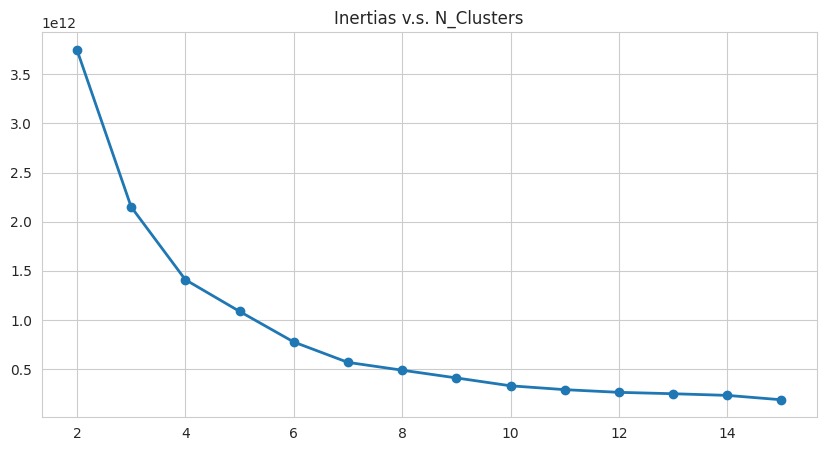

In [114]:
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_clean)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertias v.s. N_Clusters')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2);

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

### Random forest

In [108]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators is the number of trees
rfc.fit(X_trainRF, y_trainRF)

RandomForestClassifier(random_state=42)

In [115]:
# Make predictions
y_pred_clf = rfc.predict(X_testRF)

# Evaluate the model
accuracy = accuracy_score(y_testRF, y_pred_clf)
print(f"Classification Accuracy: {accuracy}")

Classification Accuracy: 0.003424657534246575


###Isolation Forest

In [116]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [117]:
rob_scaler = RobustScaler()
features = rob_scaler.fit_transform(df_clean)

In [118]:
features = pd.DataFrame(df_clean, columns=df_clean.columns[2:])
features.head(10)

,YrSold,MSZoning,LotArea,Alley,Utilities,BldgType,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,Heating,CentralAir,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,PoolArea,WoodDeckSF,OpenPorchSF
0,2008,6,8450,0,0,0,5,2003,196.0,856,0,0,2,1,3,0,2003.0,0,0,61
1,2007,6,9600,0,0,0,8,1976,0.0,1262,0,0,2,0,3,1,1976.0,0,298,0
2,2008,6,11250,0,0,0,5,2001,162.0,920,0,0,2,1,3,1,2001.0,0,0,42
3,2006,6,9550,0,0,0,5,1915,0.0,756,0,0,1,0,3,1,1998.0,0,0,35
4,2008,6,14260,0,0,0,5,2000,350.0,1145,0,0,2,1,4,1,2000.0,0,192,84
5,2009,6,14115,0,0,0,5,1993,0.0,796,0,0,1,1,1,0,1993.0,0,40,30
6,2007,6,10084,0,0,0,5,2004,186.0,1686,0,0,2,0,3,1,2004.0,0,255,57
7,2009,6,10382,0,0,0,6,1973,240.0,1107,0,0,2,1,3,2,1973.0,0,235,204
8,2008,7,6120,0,0,0,5,1931,0.0,952,0,0,2,0,2,2,1931.0,0,90,0
9,2008,6,7420,0,0,0,6,1939,0.0,991,0,0,1,0,2,2,1939.0,0,0,4


In [119]:
from sklearn.tree import DecisionTreeRegressor
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor()

In [120]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

10.894520547945206

In [121]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

32341.31506849315


In [122]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   MoSold  YrSold  MSZoning  LotArea  Alley  Utilities  BldgType  OverallCond  \
0       2    2008         6     8450      0          0         0            5   
1       5    2007         6     9600      0          0         0            8   
2       9    2008         6    11250      0          0         0            5   
3       2    2006         6     9550      0          0         0            5   
4      12    2008         6    14260      0          0         0            5   

   YearBuilt  MasVnrArea  ...  Heating  CentralAir  FullBath  HalfBath  \
0       2003       196.0  ...        0           0         2         1   
1       1976         0.0  ...        0           0         2         0   
2       2001       162.0  ...        0           0         2         1   
3       1915         0.0  ...        0           0         1         0   
4       2000       350.0  ...        0           0         2         1   

   BedroomAbvGr  Fire